In [22]:
import numpy as np
from PIL import Image
import config
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision.utils import save_image
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2


class GehirnDataset(Dataset):
    def __init__(self,root_dir):
        self.root_dir = root_dir
        self.list_files = os.listdir(self.root_dir)
        print(self.list_files)

    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        img_file = self.list_files[index]
        img_path = os.path.join(self.root_dir,img_file)
        image = np.array(Image.open(img_path))
        width = image.shape[1]
        width = width //2 
        input_image = image[:, width:, :]
        target_image = image[:,:width,:]

        # augmentations = config.both_transform(image= input_image,image0 = target_image)
        # input_image,target_image = augmentations["image"],augmentations["image0"]

        # input_image = config.transform_only_input(image = input_image)["image"]
        # target_image = config.transform_only_mask(image = target_image)["image"]

        return input_image,target_image

['522.png', '279.png', '210.png', '546.png', '291.png', '148.png', '410.png', '37.png', '61.png', '213.png', '116.png', '595.png', '140.png', '556.png', '245.png', '627.png', '476.png', '524.png', '575.png', '686.png', '649.png', '659.png', '693.png', '805.png', '442.png', '121.png', '592.png', '362.png', '582.png', '431.png', '384.png', '112.png', '119.png', '414.png', '429.png', '691.png', '192.png', '202.png', '69.png', '147.png', '446.png', '186.png', '608.png', '176.png', '764.png', '651.png', '283.png', '762.png', '114.png', '596.png', '473.png', '163.png', '563.png', '607.png', '131.png', '573.png', '672.png', '280.png', '800.png', '81.png', '531.png', '611.png', '220.png', '73.png', '347.png', '581.png', '222.png', '588.png', '657.png', '365.png', '774.png', '41.png', '599.png', '782.png', '34.png', '583.png', '618.png', '261.png', '655.png', '329.png', '642.png', '300.png', '348.png', '375.png', '430.png', '406.png', '337.png', '47.png', '226.png', '831.png', '376.png', '418.p

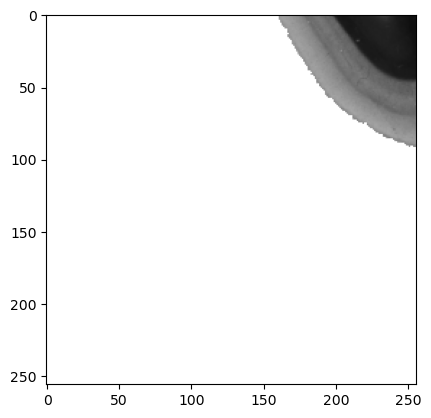

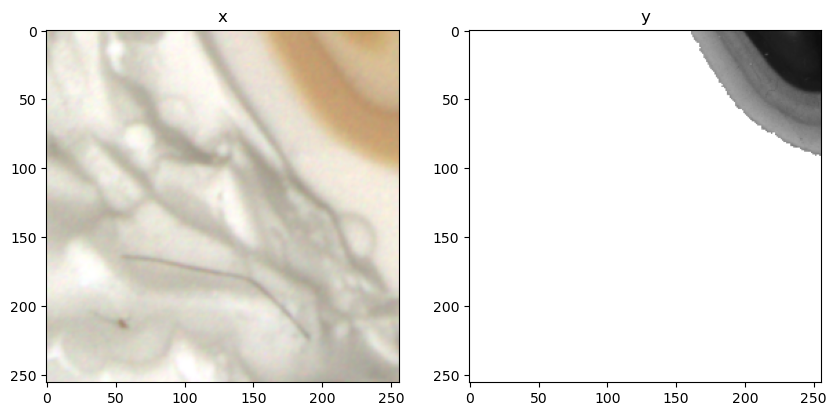

In [24]:

dataset = GehirnDataset("/home/gizmoo/dscience/Essentials/Pix2Pix/dataset/train")
loader = DataLoader(dataset, batch_size=5)
x,y  = dataset[4]
plt.imshow(y)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display x in the first subplot
axs[0].imshow(x)
axs[0].set_title('x')

# Display y in the second subplot
axs[1].imshow(y)
axs[1].set_title('y')

# Display the figure
plt.show()

# Save the figure
fig.savefig("figure.png")
